&copy; 2019 by Pearson Education, Inc. All Rights Reserved. The content in this notebook is based on the book [**Python for Programmers**](https://amzn.to/2VvdnxE).

In [1]:
# enable high-res images in notebook 
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# 14. Machine Learning: Classification, Regression and Clustering

# 14.1 Introduction to Machine Learning
* **Can we make computers learn?** 
* **machine learning**—one of the most exciting and promising subfields of **artificial intelligence**
* **Rather than programming expertise into our applications, we program them to learn from data**
* We build machine-learning **models** that make **remarkably accurate predictions**
* The **“secret sauce”** of this application-development style is **data and lots of it** 
* **Quickly solve problems** that novices and experienced programmers alike probably would not have attempted just a few years ago 
* Friendly, hands-on introduction to **simpler machine-learning techniques**

<hr style="height:2px; border:none; color:black; background-color:black;">

### Popular Machine Learning Applications
| Machine learning applications | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;
| :--- | :--- | :---
| Anomaly detection | Detecting objects in scenes | Inter-language translation
| Chatbots | Detecting patterns in data | Recommender systems (“people who bought this product also bought…”) 
| Medical treatment regimens | Medical diagnosis | Self-driving cars
| Classifying articles as sports, business, politics, entertainment | Facial recognition | Sentiment analysis  
| Computer vision and image classification | Handwriting recognition |  Spam filtering
| Credit-card fraud detection | Insurance fraud detection | Time series predictions (like stock-price forecasting and weather forecasting)
| Customer churn prediction | Network intrusion detection  | Voice recognition
| Data mining social media | Predict mortgage loan defaults | and many more...


<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.1.1 Scikit-Learn
* **Scikit-learn** conveniently packages **machine-learning algorithms** as **estimators**
* **Each is encapsulated**, hiding algorithms' complexity
* With a **small amount of code**, you’ll create powerful models quickly for **analyzing data**, **extracting insights** from data and **making predictions**
* You’ll **train models**, then make **predictions** and measure how well your models work
    * You’ll often be amazed at the **accuracy** of the results 
    * Your computer will **take on characteristics of intelligence**
* **Scikit-learn** has tools that **automate training and testing models**
* In addition to many bundled datasets, Scikit-learn makes it easy to load datasets from other sources, such as the [**20,000+ datasets** available at https://openml.org](https://openml.org)

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.1.2 Two Main Types of Machine Learning (1 of 2)

![Types of machine learning diagram](./ch14images/TypesOfMachineLearning.png "Types of machine learning diagram")

<hr style="height:2px; border:none; color:black; background-color:black;">

### Big Data and Big Computer Processing Power
* Amount of data available today is already enormous and growing exponentially 
* **The data produced in the world in the last few years equals the amount produced up to that point since the dawn of civilization**
* **“Big”** may not be a strong enough term to describe truly how huge data is becoming
* **Before machine learning**: “**I’m drowning in data** and I don’t know what to do with it” 
* **With machine learning**: “**Flood me with big data** so I can use machine-learning technology and powerful computing capabilities to extract insights and make valuable predictions from the data”
* **Exploding, low-cost computing power, memory and secondary storage** enable us to think differently about solution approaches 
* **It’s now all about predicting from data**

<hr style="height:2px; border:none; color:black; background-color:black;">

# 14.2 Case Study: Classification with k-Nearest Neighbors and the Digits Dataset, Part 1
* To process mail efficiently and route each letter to the correct destination, postal service computers must be able to **scan handwritten names, addresses and zip codes** and **recognize the letters and digits**
* **Scikit-learn** enables even novice programmers to make such machine-learning problems manageable

<hr style="height:2px; border:none; color:black; background-color:black;">

### Supervised Machine Learning: Classification 
* Attempt to **predict the distinct class** (category) to which a **sample** belongs
    * **Binary classification**&mdash;**two** classes (e.g., “dog” or “cat”)
* [**Digits dataset**](http://scikit-learn.org/stable/datasets/index.html#optical-recognition-of-handwritten-digits-dataset) bundled with scikit-learn
    * 8-by-8 pixel images representing 1797 hand-written digits (0 through 9) 
* Goal: **Predict** which digit an image represents
    * **Multi-classification**&mdash;**10 possible digits** (the classes)
* Train a classification model using **labeled data**—know in advance each digit’s class
* We’ll use one of the simplest machine-learning classification algorithms, **k-nearest neighbors (k-NN)**, to **recognize handwritten digits** 

<hr style="height:2px; border:none; color:black; background-color:black;">

### Our Approach
* We’ll begin with the **basic steps of a machine learning case study**:
	* **Decide the data** from which to **train a model**
	* **Load** and **explore the data**
	* **Split the data** for **training** and **testing**
	* **Select and build the model**
	* **Train the model**
	* **Make predictions**
* In scikit-learn, each steps require **at most a few lines of code**. 
* In the next section, we’ll 
	* **Evaluate the results**
	* **Tune the model**
	* **Run several classification models to choose the best one(s)**

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.2.1 k-Nearest Neighbors Algorithm (k-NN) (1 of 2)
* Predict a test sample’s class by looking at the **_k_ training samples** that are **nearest in "distance"** to the **test sample** 
* In following diagram the filled dots represent four sample classes—A (blue), B (green), C (red) and D (purple) 

<img src="./ch14images/nearest.png" alt="Diagram for the discussion of the k-nearest neighbors algorithm" width=300/>

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.2.1 k-Nearest Neighbors Algorithm (3 of 3)
* Predict classes to which new samples**&nbsp;X**,**&nbsp;Y** and**&nbsp;Z** belong
* Make predictions using each sample’s **3 nearest neighbors**—**3&nbsp;**is **_k_** in **k-nearest neighbors algorithm**
	* Sample**&nbsp;X**’s three nearest neighbors are all class D (purple) dots, so we’d predict that**&nbsp;X**’s class is D 
	* Sample**&nbsp;Y**’s three nearest neighbors are all class B (green) dots, so we’d predict that**&nbsp;Y**’s class is B 
	* For**&nbsp;Z**, the **choice is not as clear**, because it appears **between** the B (green) **and** C (red) dots
        * Of the three nearest neighbors, **one is class B (green)** and **two are class C (red)**
        * **Class with the most “votes” wins**, so**&nbsp;Z**’s class is **C (red)** 
* Picking an **odd _k_ value** in the kNN algorithm **avoids ties** &mdash; there’s never an equal number of votes

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.2.2 Loading the Dataset with the **`load_digits` Function** 
* Returns a **`Bunch`** object containing **digit samples** and **metadata**
* A **`Bunch`** is a dictionary with additional **dataset-specific attributes**

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()  

<hr style="height:2px; border:none; color:black; background-color:black;">

### Displaying Digits Dataset's Description
* **Digits dataset** is a subset of the [**UCI (University of California Irvine) ML hand-written digits dataset**](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)
    * Original dataset: **5620 samples**—3823 for **training** and 1797 for **testing** 
    * **Digits dataset**: Only the **1797 testing samples**
* A Bunch’s **`DESCR` attribute** contains dataset's description 
    * Each sample has **`64` features** (**`Number of Attributes`**) that represent an **8-by-8 image** with **pixel values `0`–`16`** (**`Attribute Information`**)
    * **No missing values** (**`Missing Attribute Values`**) 
* **64 features** may seem like a lot
    * Datasets can have **hundreds**, **thousands** or even **millions of features**
    * Processing datasets like these can require enormous computing capabilities

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

<hr style="height:2px; border:none; color:black; background-color:black;">

### Checking the Sample and Target Sizes (1 of 2)
* `Bunch` object’s **`data`** and **`target`** attributes are **NumPy arrays**:
    * **`data` array**: The **1797 samples** (digit images), each with **64 features** with values**&nbsp;0** (white) to **16** (black), representing **pixel intensities**
    ![Pixel intensities in grayscale shades from white (0) to black (16)](./ch14images/grays.png "Pixel intensities in grayscale shades from white (0) to black (16)")

    * **`target` array**: The **images’ labels**, (classes) indicating **which digit** each image represents

In [5]:
digits.target[::100]  # target values of every 100th sample

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

<hr style="height:2px; border:none; color:black; background-color:black;">

### Checking the Sample and Target Sizes (2 of 2)
* Confirm number of **samples** and **features** (per sample) via `data` array’s **`shape`**

In [6]:
digits.data.shape

(1797, 64)

* Confirm that **number of target values matches number of samples** via `target` array’s `shape`

In [7]:
digits.target.shape

(1797,)

<hr style="height:2px; border:none; color:black; background-color:black;">

### A Sample Digit Image (1 of 2)
* Images are **two-dimensional**—width and a height in pixels 
* Digits dataset's `Bunch` object has an **`images` attribute**
    * Each element is an **8-by-8 array** representing a **digit image’s pixel intensities**
* Scikit-learn stores the intensity values as **NumPy type `float64`**

In [8]:
digits.images[13]  # show array for sample image at index 13

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

<hr style="height:2px; border:none; color:black; background-color:black;">

### A Sample Digit Image 
* Visualization of `digits.images[13]`

    <img src="./ch14images/sampledigit3.png" alt="Image of a handwritten digit 3" width="200px"/>

<hr style="height:2px; border:none; color:black; background-color:black;">

### Preparing the Data for Use with Scikit-Learn (1 of 2)
* Scikit-learn estimators require samples to be stored in a **two-dimensional array of floating-point values** (or **list of lists** or **pandas `DataFrame`**): 
	* Each **row** represents one **sample** 
	* Each **column** in a given row represents one **feature** for that sample
* Multi-dimensional data samples must be **flattened** into a **one-dimensional array** 
* For **categorical features** (e.g., **strings** like `'spam'` or `'not-spam'`), you’d have to **preprocess** those features into **numerical values**—known as **one-hot encoding** (discussed later in deep learning)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Preparing the Data for Use with Scikit-Learn (2 of 2)
* **`load_digits`** returns the **preprocessed data** ready for machine learning 
* **8-by-8 array `digits.images[13]`** corresponds to **1-by-64 array `digits.data[13]`**:

In [9]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.2.3 Visualizing the Data (1 of 2)
* Always familiarize yourself with your data&mdash;called **data exploration** 
* Let's **visualize** the dataset’s first 24 images with **Matplotlib**
* To see **how difficult a problem handwritten digit recognition is**, consider the **variations** among the images of the 3s in the first, third and fourth rows, and look at the images of the 2s in the first, third and fourth rows. 

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.2.3 Visualizing the Data (1 of 2)
<img src="./ch14images/24digits.png" alt="First 24 digit images in the digits dataset" width=400/>

<hr style="height:2px; border:none; color:black; background-color:black;">

### Creating the Diagram
* **Color map `plt.cm.gray_r`** is for **grayscale** with **0 for white**
* [**Matplotlib’s color map names**](https://matplotlib.org/examples/color/colormaps_reference.html)&mdash;accessible via **`plt.cm` object** or a **string, like `'gray_r'`**

In [10]:
import matplotlib.pyplot as plt

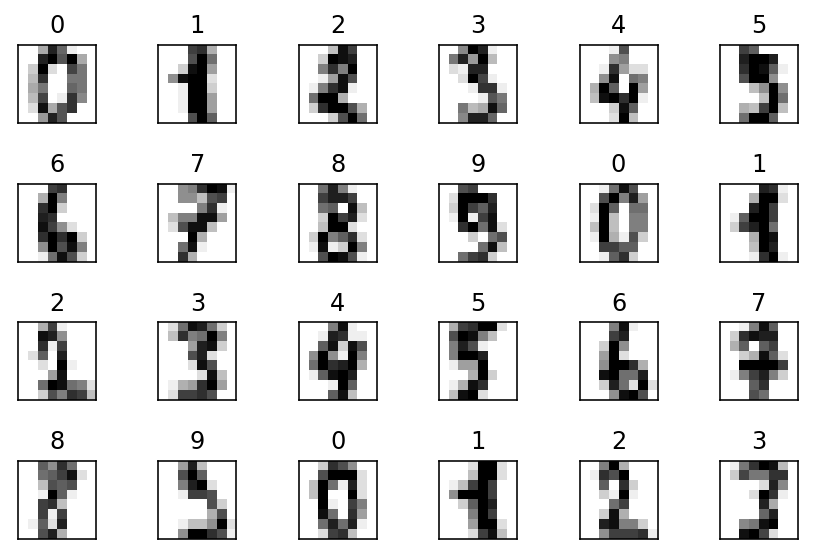

In [11]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item 
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.2.4 Splitting the Data for Training and Testing (1 of 2)
* Typically **train** a model with a **subset of a dataset**
* **Save a portion for testing**, so you can evaluate a model’s performance using **unseen data**
* Function **`train_test_split`** **shuffles** the data to **randomize** it, then **splits** the **samples** in the `data` array and the **target values** in the `target` array into **training** and **testing sets**
    * Shuffling helps ensure that the **training and testing sets** have **similar characteristics**
    * Returns a **tuple of four elements** in which the **first two** are the **samples** split into **training** and **testing sets**, and the **last two** are the **corresponding target values** split into **training** and **testing sets**

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.2.4 Splitting the Data for Training and Testing (2 of 2)
* Convention: 
    * **Uppercase `X`** represents **samples**
    * **Lowercase `y`** represents **target values**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11)  # random_state for reproducibility

* Scikit-learn bundled classification datasets have **balanced classes**
    * Samples are **divided evenly** among the classes
    * **Unbalanced classes** could lead to incorrect results

<hr style="height:2px; border:none; color:black; background-color:black;">

### Training and Testing Set Sizes 
* **By default**, `train_test_split` reserves **75%** of the data for **training** and **25%** for **testing**
    * See how to customize this in my [**Python Fundamentals LiveLessons** videos](https://learning.oreilly.com/videos/python-fundamentals/9780135917411/9780135917411-PFLL_Lesson14_11) or in [**Python for Programmers**, Section 14.2.4](https://learning.oreilly.com/library/view/python-for-programmers/9780135231364/ch14.xhtml#ch14lev2sec8)

In [14]:
X_train.shape

(1347, 64)

In [15]:
X_test.shape

(450, 64)

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.2.5 Creating the Model 
* In **scikit-learn**, **models** are called **estimators** 
* **`KNeighborsClassifier`** estimator implements the **k-nearest neighbors algorithm**

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier()

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.2.6 Training the Model with the `KNeighborsClassifier` Object’s **`fit` method** (1 of 2)
* Load **sample training set (`X_train`)** and **target training set (`y_train`)** into the estimator

In [18]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

* **`n_neighbors`** corresponds to **_k_ in the k-nearest neighbors algorithm** 
* [`KNeighborsClassifier` default settings](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.2.6 Training the Model with the `KNeighborsClassifier` Object’s **`fit` method** (2 of 2)
* **`fit` normally loads data** into an **estimator** then performs complex calculations **behind the scenes** that **learn** from the data to train a model
* **`KNeighborsClassifier`’s `fit` method** **just loads the data** 
    * **No initial learning process** 
    * The **estimator** is **lazy** &mdash; work is performed only when you use it to make predictions
* **Lots of models** have **significant training phases** that can take minutes, hours, days or more 
    * High-performance **GPUs** and **TPUs** can significantly **reduce model training time**

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.2.7 Predicting Digit Classes with the `KNeighborsClassifier`’s  **`predict` method** (1 of 2)
* Returns an array containing the **predicted class of each test image**: 

In [19]:
predicted = knn.predict(X=X_test)

In [20]:
expected = y_test

* **`predicted` digits** vs. **`expected` digits** for the first 20 test samples&mdash;see **index 18**

In [21]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [22]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.2.7 Predicting Digit Classes with the `KNeighborsClassifier`’s **`predict` method** (2 of 2)
* Locate **all incorrect predictions** for the **entire test set**: 

In [23]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [24]:
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

* **Incorrectly predicted only 10 of the 450 test samples**

<hr style="height:2px; border:none; color:black; background-color:black;">

# 14.3 Case Study: Classification with k-Nearest Neighbors and the Digits Dataset, Part 2
* **Evaluate** the k-NN classification estimator’s **accuracy** 
* **Execute multiple estimators** and **compare their results** so you can **choose the best**
* T**une k-NN’s hyperparameter _k_** to get the best performance out of a `KNeighborsClassifier`. 

## 14.3.1 Metrics for Measuring Model Accuracy 

### Estimator Method `score`
* Returns an **indication of how well the estimator performs** on **test data** 
* For **classification estimators**, returns the **prediction accuracy** for the test data:

In [25]:
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


* `kNeighborsClassifier` with default **_k_** of 5 achieved **97.78% prediction accuracy** using only the estimator’s **default parameters**
* Can use **hyperparameter tuning** to try to determine the **optimal value for _k_**

<hr style="height:2px; border:none; color:black; background-color:black;">

### Confusion Matrix (1 of 2)
* Shows correct and incorrect predicted values (the **hits** and **misses**) for a given class 

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [28]:
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]])

### Confusion Matrix (2 of 2)
* **Correct predictions** shown on **principal diagonal** from top-left to bottom-right
* **Nonzero values** not on **principal diagonal** indicate **incorrect predictions** 
* Each **row** represents **one distinct class** (0–9) 
* **Columns** specify how many **test samples** were classified into classes 0–9 
* **Row 0** shows digit class **`0`**&mdash;**all 0s were predicted correctly**
>`[45,  0,  0,  0,  0,  0,  0,  0,  0,  0]`
* **Row 8** shows digit class **`8`**&mdash;**five 8s were predicted incorrectly**
>`[ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1]`

    * **Correctly predicted 88.63%** (39 of 44) of `8`s
    * 8s harder to recognize

<hr style="height:2px; border:none; color:black; background-color:black;">

### Visualizing the Confusion Matrix 
* A **heat map** displays **values** as **colors**
    * **higher magnitudes** displayed as **more intense colors** 
* Convert the **confusion matrix** into a **`DataFrame`**, then graph it
* **Principal diagonal** and **incorrect predictions** stand out nicely in **heat map**

In [29]:
import pandas as pd

In [30]:
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

In [31]:
import seaborn as sns

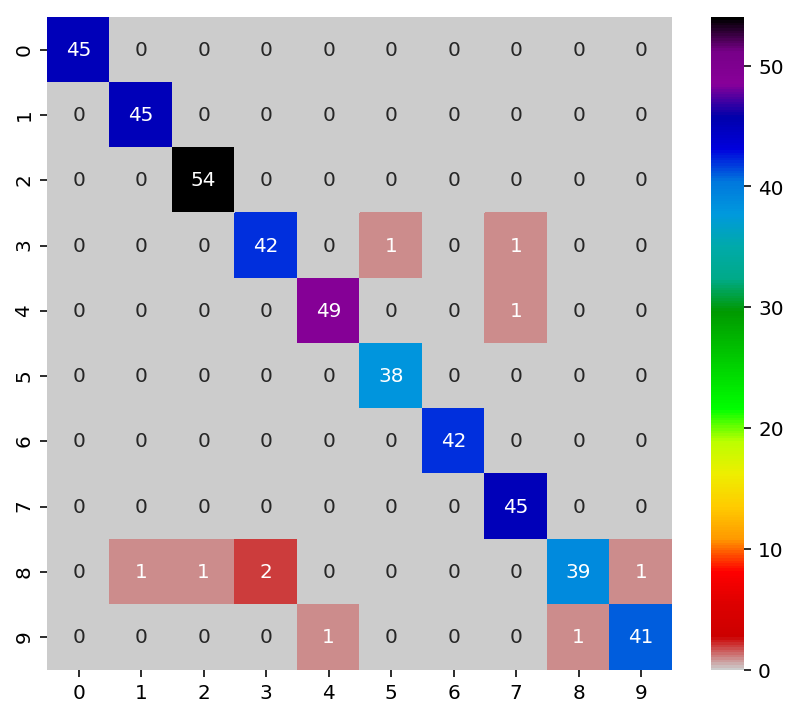

In [32]:
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True, 
                   cmap=plt.cm.nipy_spectral_r) 

<!-- ### Visualizing the Confusion Matrix (3 of 4)
![Confusion matrix displayed as a heat map](./ch14images/confusion_nipy_spectral_r.png "Confusion matrix displayed as a heat map") -->

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.3.2 K-Fold Cross-Validation
* Uses **all of your data** for **training and testing**
* Gives a better sense of how well your model will make predictions
* **Splits the dataset** into **_k_ equal-size folds** (unrelated to**&nbsp;k** in the k-nearest neighbors algorithm)
* **Repeatedly trains** your model with **_k_ – 1 folds** and **test the model** with the **remaining fold**
* Consider using **_k_ = 10** with **folds numbered 1 through 10**
	* **train** with **folds 1–9**, then **test** with **fold 10**
	* **train** with **folds 1–8 and 10**, then **test** with **fold 9**
	* **train** with **folds 1–7** and **9–10**, then **test** with **fold 8**
    * ...

<hr style="height:2px; border:none; color:black; background-color:black;">

### `KFold` Class
* **`KFold`** class and function **`cross_val_score`** perform **k-fold cross validation** 
* **`n_splits=10`** specifies the **number of folds**
* **`shuffle=True`** **randomizes** the data before **splitting it into folds** 
	* Particularly **important** if the **samples** might be **ordered** or **grouped** (as in **Iris dataset** we'll see later)

In [33]:
from sklearn.model_selection import KFold

In [34]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Calling Function `cross_val_score` to Train and Test Your Model (1 of 2)
* **`estimator=knn`** &mdash; **estimator** to validate
* **`X=digits.data`** &mdash; **samples** to use for training and testing
* **`y=digits.target`** &mdash; **target predictions** for the samples
* **`cv=kfold`** &mdash; **cross-validation generator** that defines how to **split** the **samples** and **targets** for training and testing

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)

### Calling Function `cross_val_score` to Train and Test Your Model (2 of 2)
* Lowest accuracy was **97.78%** &mdash; one was **100%**

In [37]:
scores  # array of accuracy scores for each fold

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [38]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 98.72%


* Mean accuracy even better than the **97.78% we achieved** when we **trained** the model with **75%** of the data and **tested** the model with **25%** earlier

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.3.3 Running Multiple Models to Find the Best One (1 of 3)
* **Difficult to know in advance** which machine learning model(s) will **perform best for a given dataset**
    * Especially when they hide the details of how they operate
* Even though the **`KNeighborsClassifier`** predicts digit images with a high degree of accuracy, it’s **possible** that other estimators are **even more accurate**
* Let’s **compare** **`KNeighborsClassifier`**, **`SVC`** and **`GaussianNB`**

## 14.3.3 Running Multiple Models to Find the Best One (2 of 3)

In [39]:
from sklearn.svm import SVC

In [40]:
from sklearn.naive_bayes import GaussianNB

* **Create the estimators** 
* To avoid a scikit-learn warning, we supplied a keyword argument when creating the **`SVC`** estimator
    * This argument’s value will become the default in scikit-learn version 0.22

In [41]:
estimators = {
    'KNeighborsClassifier': knn, 
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()}

## 14.3.3 Running Multiple Models to Find the Best One (3 of 3)
* **Execute the models**: 

In [42]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


* **`KNeighborsClassifier`** and **`SVC`** estimators’ accuracies are identical so we might want to **perform hyperparameter tuning** on each to determine the best

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.3.4 Hyperparameter Tuning (1 of 3)
* In real-world machine learning studies, you’ll want to **tune hyperparameters** to choose values that produce the **best possible predictions**
* To **determine** the **best value** for **_k_** in the **kNN algorithm**, **try different values** and **compare performance**  
* Scikit-learn also has **automated hyperparameter tuning** capabilities

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.3.4 Hyperparameter Tuning (2 of 3)
* Create `KNeighborsClassifiers` with odd **k** values from 1 through 19
* Perform **k-fold cross-validation** on each

In [43]:
for k in range(1, 20, 2):  # k is an odd value 1-19; odds prevent ties
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, 
        X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.78%; standard deviation=0.78%
k=5 ; mean accuracy=98.72%; standard deviation=0.75%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.39%; standard deviation=0.80%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.89%; standard deviation=1.02%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%


## 14.3.4 Hyperparameter Tuning (3 of 3)
* **Machine learning** is not without its **costs**, especially in **big data** and **deep learning**
* **Compute time grows rapidly with _k_**, because **k-NN** needs to perform **more calculations** to find the **nearest neighbors**
* Can use function **`cross_validate`** to perform cross-validation **and** time the results

<hr style="height:2px; border:none; color:black; background-color:black;">

# 14.4 Case Study: Time Series and Simple Linear Regression 
* **Simple linear regression** is the **simplest** regression algorithm
* Given a collection of numeric values representing an **independent variable** and a **dependent variable**, simple linear regression **describes the relationship between these variables with a straight line**, known as the **regression line**
* Using a **time series** of average New York City January high-temperature data for 1895 through 2018, we'll
    * Perform **simple linear regression**
    * Display a **scatter plot** with a **regression line** 
    * Use the **coefficient** and **intercept values** calculated by the estimator to **make predictions**
* Temperature data stored in **`ave_hi_nyc_jan_1895-2018.csv`**

<hr style="height:2px; border:none; color:black; background-color:black;">

### Loading the Average High Temperatures into a `DataFrame` 
* Load the data from `ave_hi_nyc_jan_1895-2018.csv`, rename the `'Value'` column to `'Temperature'`, remove `01` from the end of each date value and display a few data samples:

In [44]:
import pandas as pd

In [45]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [46]:
nyc.head(3)

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [47]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [48]:
nyc.Date = nyc.Date.floordiv(100)

In [49]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


<hr style="height:2px; border:none; color:black; background-color:black;">

### Splitting the Data for Training and Testing (1 of 3)
* We’ll use the **`LinearRegression`** estimator from **`sklearn.linear_model`** 
* By default, this estimator uses **all** the **numeric features** in a dataset to perform **multiple linear regression**  
* For **simple linear regression** select **one** feature (the `Date` here) as the **independent variable**
    * A column in `DataFrame` is a **one-dimensional** `Series` 
    * Scikit-learn estimators require training and testing data to be **two-dimensional** 
    * We'll transform **`Series` of _n_** elements, into two dimensions containing **_n_ rows** and **one column** 

### Splitting the Data for Training and Testing (2 of 3)
* `nyc.Date.values` returns NumPy array containing `Date` column’s values
* **`reshape(-1, 1)`** tells `reshape` to **infer** the number of rows, based on the number of columns (`1`) and the number of elements (124) in the array
    * Transformed array will have 124 rows and one column

In [51]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

### Splitting the Data for Training and Testing (3 of 3)
* Confirm the **75%–25% train-test split** 

In [52]:
X_train.shape

(93, 1)

In [53]:
X_test.shape

(31, 1)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Training the Model (1 of 2)
* [**LinearRegression default settings**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
linear_regression = LinearRegression()

In [56]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

* To find the **best fitting regression line** for the data, the `LinearRegression` estimator **iteratively adjusts** the **slope** and **intercept** to **minimize** the **sum of the squares** of the data points’ **distances** from the line 


<hr style="height:2px; border:none; color:black; background-color:black;">

### Training the Model (2 of 2)
* We'll soon use **slope** and **intercept** to make **predictions** with 

\begin{equation}
y = m x + b
\end{equation}

* Slope is the estimator’s **`coeff_`** attribute (**m** in the equation) 
* Intercept is the estimator’s **`intercept_`** attribute (**b** in the equation)

In [57]:
linear_regression.coef_

array([0.01939167])

In [58]:
linear_regression.intercept_

-0.30779820252656265

<hr style="height:2px; border:none; color:black; background-color:black;">

### Testing the Model
* Test the model using the data in **`X_test`** and check some of the **predictions**

In [59]:
predicted = linear_regression.predict(X_test)

In [60]:
expected = y_test

In [61]:
for p, e in zip(predicted[::5], expected[::5]):  # check every 5th element
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


<hr style="height:2px; border:none; color:black; background-color:black;">

### Predicting Future Temperatures and Estimating Past Temperatures 
* Use the **coefficient** and **intercept** values to make **predictions** 

In [62]:
# lambda implements y = mx + b
predict = (lambda x: linear_regression.coef_ * x + 
                     linear_regression.intercept_)

In [63]:
predict(2019)

array([38.84399018])

In [64]:
predict(1890)

array([36.34246432])

<hr style="height:2px; border:none; color:black; background-color:black;">

### Visualizing the Dataset with the Regression Line 
* Create a **scatter plot** with a regression line 
* **Cooler** temperatures shown in **darker colors**

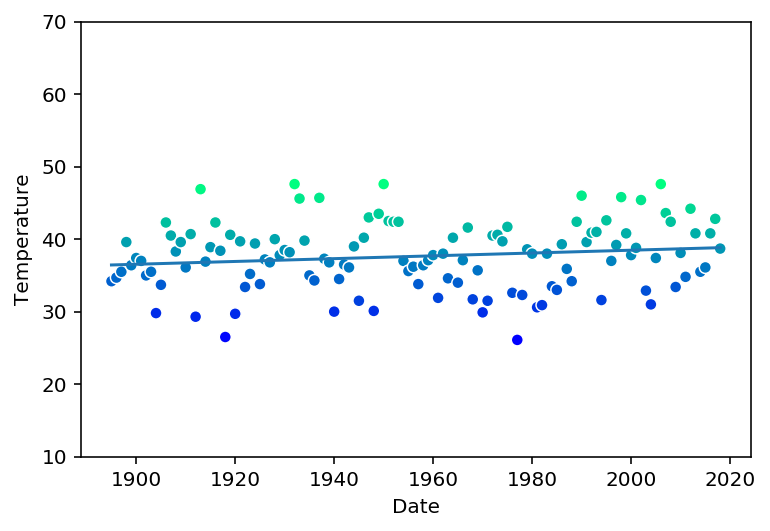

In [65]:
import seaborn as sns

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
    hue='Temperature', palette='winter', legend=False)  

axes.set_ylim(10, 70)  # scale y-axis 

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt

line = plt.plot(x, y)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Common Problems That Prevent Accurate Predictions: Overfitting/Underfitting
* When creating a model, key goal is **making accurate predictions** for **data it has not yet seen** 
* **Underfitting** occurs when a **model is too simple to make predictions**, based on its training data
    * You may use a **linear model**, such as **simple linear regression**, when problem really requires a **non-linear model**
* **Overfitting** occurs when your **model is too complex**
    * **Most extreme case** would be a **model that memorizes its training data**
    * New data that **matches the training data** will produce **perfect predictions**, but the model will not know what to do with data it has never seen.

<hr style="height:2px; border:none; color:black; background-color:black;">

# 14.5 Case Study: Multiple Linear Regression with the California Housing Dataset
* [**California Housing dataset**](http://lib.stat.cmu.edu/datasets) bundled with scikit-learn 
* **Larger real-world dataset** 
    **20,640 samples**, each with **eight numerical features**
	* Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297. Submitted to the StatLib Datasets Archive by Kelley Pace (kpace@unix1.sncc.lsu.edu). [9/Nov/99]. 
* Perform **multiple linear regression** using **all eight numerical features** 
    * Make **more sophisticated housing price predictions** than if we were to use only a **single feature** or a **subset of the features**
* **`LinearRegression`** estimator performs **multiple linear regression** by default

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.5.1 Loading the Dataset (1 of 3)
* According to the California Housing Prices dataset’s description in scikit-learn
> "This dataset was **derived from the 1990 U.S. census**, using **one row per census block group**.  
>  
> "A **block group** is the **smallest geographical unit** for which the U.S. Census Bureau publishes sample data (typically has a **population of 600 to 3,000 people**)."

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.5.1 Loading the Dataset (2 of 3)
* The dataset has **20,640 samples**—**one per block group**—with **eight features** each:
	* **median income**—in tens of thousands, so 8.37 would represent $83,700
	* **median house age**—in the dataset, the maximum value for this feature is 52
	* **average number of rooms** 
	* **average number of bedrooms** 
	* **block population**
	* **average house occupancy**
	* **house block latitude**
	* **house block longitude**

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.5.1 Loading the Dataset (3 of 3)
* **Target** &mdash; **median house value** in hundreds of thousands, so 3.55 would represent \$355,000
    * **Maximum** for this feature is**&nbsp;5** for **\$500,000** 
* Reasonable to expect **more bedrooms**, **more rooms** or **higher income** would mean **higher house value**
* **Combine all numeric features to make predictions**
    * More likely to get **more accurate predictions** than with simple linear regression

<hr style="height:2px; border:none; color:black; background-color:black;">

### Loading the Data with `sklearn.datasets` Function **`fetch_california_housing`** 

In [66]:
from sklearn.datasets import fetch_california_housing

In [67]:
california = fetch_california_housing()  # Bunch object 

In [68]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

<hr style="height:2px; border:none; color:black; background-color:black;">

### Getting to Know the Data
* Confirm number of **samples/features**, number of **targets**, **feature names**

In [69]:
california.data.shape

(20640, 8)

In [70]:
california.target.shape

(20640,)

In [71]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.5.2 Exploring the Data with a Pandas `DataFrame` (1 of 4)

In [72]:
import pandas as pd

In [73]:
pd.set_option('precision', 2)  # 2 digit precision for floats

<!-- # Used for command line outputs in IPython interactive mode
#pd.set_option('max_columns', 9)  # display up to 9 columns in DataFrame outputs

#pd.set_option('display.width', None)  # auto-detect the display width for wrapping
-->

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.5.2 Exploring the Data with a Pandas `DataFrame` (2 of 4)
* Second statement adds a **`DataFrame` column** for **median house values**

In [74]:
california_df = pd.DataFrame(california.data, 
                             columns=california.feature_names)

In [75]:
california_df['MedHouseValue'] = pd.Series(california.target)

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.5.2 Exploring the Data with a Pandas `DataFrame` (3 of 4)

In [76]:
california_df.head()  # peek at first 5 rows

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.33,41.0,6.98,1.02,322.0,2.56,37.88,-122.23,4.53
1,8.30,21.0,6.24,0.97,2401.0,2.11,37.86,-122.22,3.58
2,7.26,52.0,8.29,1.07,496.0,2.80,37.85,-122.24,3.52
3,5.64,52.0,5.82,1.07,558.0,2.55,37.85,-122.25,3.41
4,3.85,52.0,6.28,1.08,565.0,2.18,37.85,-122.25,3.42


<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.5.2 Exploring the Data with a Pandas `DataFrame` (4 of 4)
* Calculate **`DataFrame`’s summary statistics** 
* Median income and house values are from 1990 and are **significantly higher today** 
* Output is **left-to-right scrollable in Jupyter** if it does not fit in your screen width

In [77]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.5.3 Visualizing the Features (1 of 3)
* Helpful to **visualize** data by **plotting the target value** against **each** feature
    Shows how **median home value** relates to **each feature**
* To make our visualizations clearer, let’s use **`DataFrame` method **`sample`**** to **randomly select 10% of the 20,640 samples** for graphing

In [78]:
sample_df = california_df.sample(frac=0.1, random_state=17)

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.5.3 Visualizing the Features (2 of 3)
* Display **scatter plots** of several **features** 
* Each shows **feature** on **x-axis** and **median home value** on **y-axis**


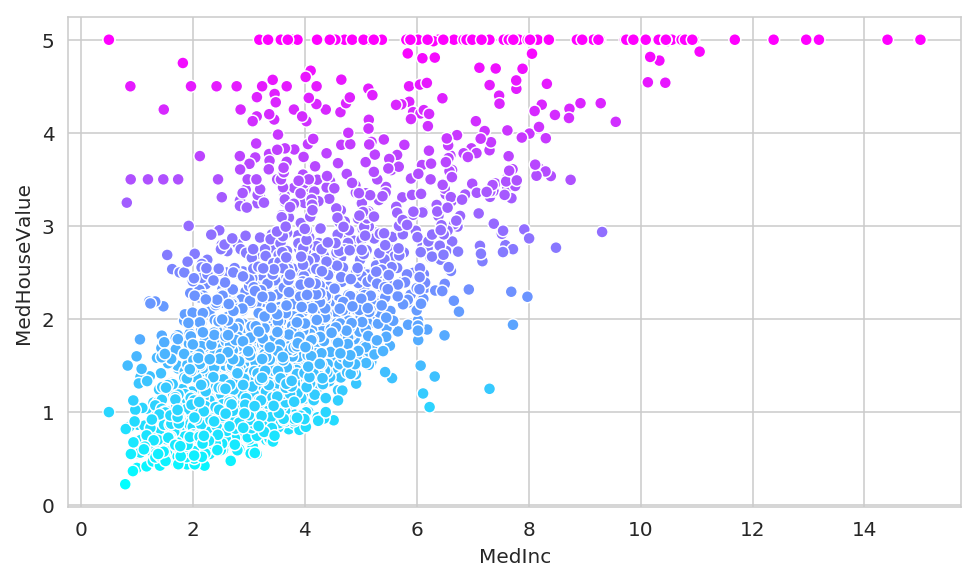

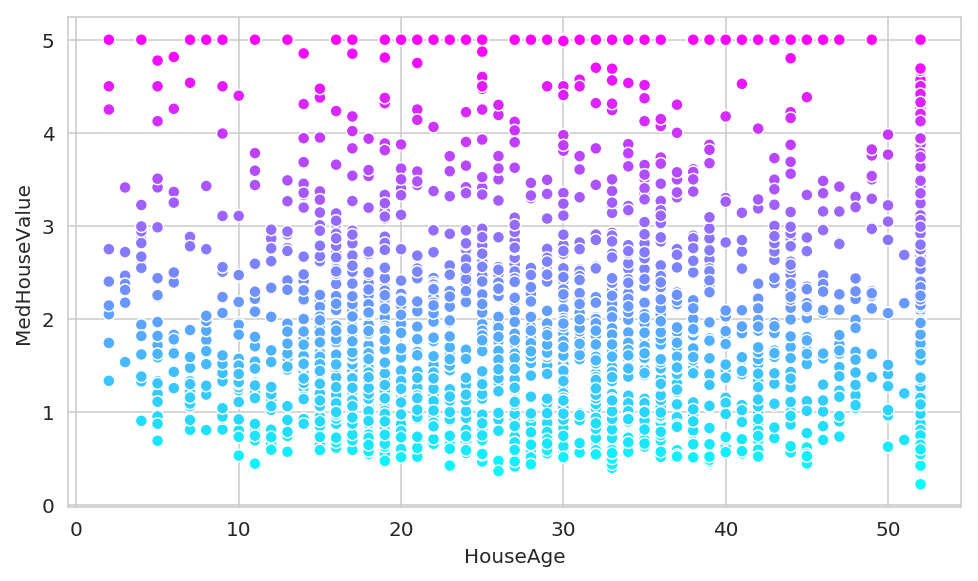

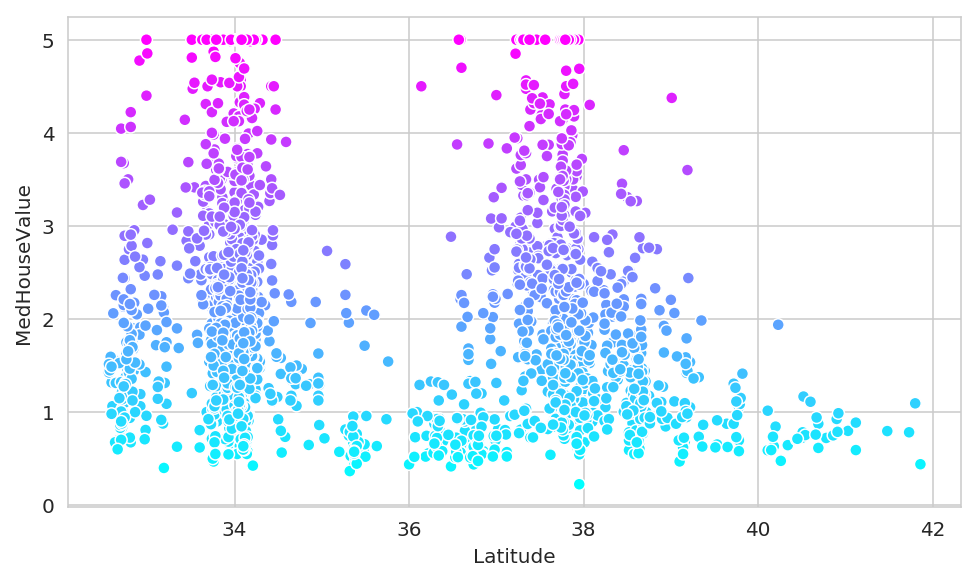

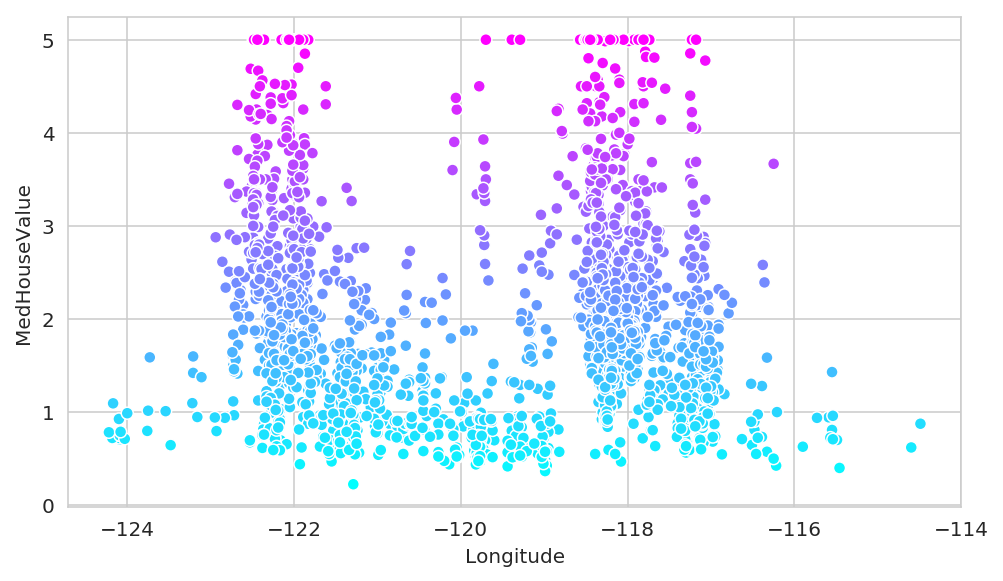

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')                                    

for feature in ['MedInc', 'HouseAge', 'Latitude', 'Longitude']:
    plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
    sns.scatterplot(data=sample_df, x=feature, 
                    y='MedHouseValue', hue='MedHouseValue', 
                    palette='cool', legend=False)

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.5.3 Visualizing the Features (3 of 3)
* Some **interesting things** to notice in these graphs:
	* **Latitude and longitude graphs** each have **two areas** of especially significant density&mdash;**greater Los Angeles** and **greater San Francisco** areas where house prices tend to be higher
    * Each graph shows a **horizontal line of dots at the y-axis value 5**, which represents the [**maximum median house value \$500,000** listed in the 1990 census form](https://www.census.gov/prod/1/90dec/cph4/appdxe.pdf)
        * **Being able to spot characteristics like this is a compelling reason to do data exploration and visualization**
    * **`HouseAge` graph** shows a **vertical line of dots** at the **x-axis value 52**
        * **Highest home age** on the 1990 census form was **52**

<hr style="height:2px; border:none; color:black; background-color:black;">

<!-- ![California Housing Dataset scatterplot of Median House Value vs. Median Income](./ch14images/medincome.png "California Housing Dataset scatterplot of Median House Value vs. Median Income")
 ![California Housing Dataset scatterplot of Median House Value vs. House Age](./ch14images/houseage.png "California Housing Dataset scatterplot of Median House Value vs. House Age")
 ![California Housing Dataset scatterplot of Median House Value vs. Average Rooms](./ch14images/averooms.png "California Housing Dataset scatterplot of Median House Value vs. Average Rooms")
 ![California Housing Dataset scatterplot of Median House Value vs. Average Bedrooms](./ch14images/avebedrooms.png "California Housing Dataset scatterplot of Median House Value vs. Average Bedrooms")
 ![California Housing Dataset scatterplot of Median House Value vs. Population](./ch14images/population.png "California Housing Dataset scatterplot of Median House Value vs. Population")
 ![California Housing Dataset scatterplot of Median House Value vs. Average Occupancy](./ch14images/aveoccupancy.png "California Housing Dataset scatterplot of Median House Value vs. Average Occupancy")
 ![California Housing Dataset scatterplot of Median House Value vs. Lattitude](./ch14images/lattitude.png "California Housing Dataset scatterplot of Median House Value vs. Lattitude")
 ![California Housing Dataset scatterplot of Median House Value vs. Longitude](./ch14images/longitude.png "California Housing Dataset scatterplot of Median House Value vs. Longitude")<hr style="height:2px; border:none; color:black; background-color:black;"> -->

## 14.5.4 Splitting the Data for Training and Testing Using `train_test_split`  

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    california.data, california.target, random_state=11)

In [82]:
X_train.shape

(15480, 8)

In [83]:
X_test.shape

(5160, 8)

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.5.5 Training the Model (1 of 3)
* **`LinearRegression`** tries to use **all** features in a dataset’s `data` array
    * **error** if any features are **categorical**  
    * Categorical data must be preprocessed into numerical data or excluded
* **Scikit-learn’s bundled datasets** are already in the **correct format** for training

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
linear_regression = LinearRegression()

In [86]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 14.5.5 Training the Model (2 of 3)
* **Separate coefficients** for each feature (stored in `coeff_`) and **one intercept** (stored in `intercept_`) 
    * **Positive coefficients** &mdash; median house value **increases** as feature value **increases** 
    * **Negative coefficients** &mdash; median house value **decreases** as feature value **increases**
    * **HouseAge**, **AveOccup** and **Population** are **close to zero**, so these apparently have little to no affect on **median house value**

In [87]:
for i, name in enumerate(california.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')  

    MedInc: 0.4377030215382206
  HouseAge: 0.009216834565797713
  AveRooms: -0.10732526637360985
 AveBedrms: 0.611713307391811
Population: -5.756822009298454e-06
  AveOccup: -0.0033845664657163703
  Latitude: -0.419481860964907
 Longitude: -0.4337713349874016


In [88]:
linear_regression.intercept_

-36.88295065605547

## 14.5.5 Training the Model (3 of 3)
* Can use coefficient values in following equation to **make predictions**:

\begin{equation}
y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + b
\end{equation}

* <em>m</em><sub>1</sub>, <em>m</em><sub>2</sub>, …, <em>m</em><sub><em>n</em></sub> are the **feature coefficients**
* <em>b</em> is the **intercept**
* <em>x</em><sub>1</sub>, <em>x</em><sub>2</sub>, …, <em>x</em><sub><em>n</em></sub> are **feature values** (the **independent variables**)
* <em>y</em> is the **predicted value** (the **dependent variable**)
   

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.5.6 Testing the Model with the Estimator’s `predict `Method (1 of 2)

In [89]:
predicted = linear_regression.predict(X_test)

In [90]:
expected = y_test

In [91]:
predicted[:5]  # first 5 predictions

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

In [92]:
expected[:5]   # first five targets 

array([0.762, 1.732, 1.125, 1.37 , 1.856])

## 14.5.6 Testing the Model with the Estimator’s `predict `Method (2 of 2)
* In **classification**, **predictions** were **distinct classes** that **matched existing classes** in the dataset
* In **regression**, it’s **tough to get exact predictions**, because you have **continuous outputs**
    * Every possible value of <em>x</em><sub>1</sub>, <em>x</em><sub>2</sub> … <em>x</em><sub><em>n</em></sub> in the following calculation predicts a value

\begin{equation}
y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + b
\end{equation}


<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.5.8 Regression Model Metrics
* **Metrics for regression estimators** include **coefficient of determination** (**$R^{2}$ score**; 0.0-1.0)
    * **1.0** &mdash; estimator **perfectly predicts** the **dependent variable’s value**, given independent variables' values
    * **0.0** &mdash; **model cannot make predictions with any accuracy**, given independent variables’ values 
* Calculate with arrays representing the **expected** and **predicted results**

In [93]:
from sklearn import metrics

In [94]:
metrics.r2_score(expected, predicted)

0.6008983115964333

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.5.9 Choosing the Best Model (1 of 2)
* **Try several estimators** to determine whether any **produces better results** than `LinearRegression` 
* [Information about estimators used here](https://scikit-learn.org/stable/modules/linear_model.html)

In [96]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [97]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.5.9 Choosing the Best Model (2 of 2)
* Run the estimators using **k-fold cross-validation** 
* **`cross_val_score` argument `scoring='r2'`** &mdash; report **$R^{2}$ scores** for **each fold**
    * **1.0 is best**, so **`LinearRegression`** and **`Ridge`** appear to be **best models** for this dataset

In [98]:
from sklearn.model_selection import KFold, cross_val_score

In [99]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=california.data, y=california.target, cv=kfold,
        scoring='r2')
    print(f'{estimator_name:>16}: ' + 
          f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599


<hr style="height:2px; border:none; color:black; background-color:black;">

# 14.6 Case Study: Unsupervised Machine Learning, Part 1—Dimensionality Reduction (1 of 3)
* We’ve focused on **getting to know your data**
* **Unsupervised machine learning** and **visualization** can help you do this by **finding patterns and relationships among unlabeled samples**
* Visualizing data with **two variables** is easy
    * Plot data in **2D** with **one variable along each axis**
    * Visualization libraries also can plot datasets with **three variables in 3D** 
* But how do you visualize data with **more than three dimensions**?
    * **Digits dataset** samples each have **64 features (dimensions) and a target value** 
    * **Big data** samples can have **hundreds**, **thousands** or even **millions of features (dimensions)**


<hr style="height:2px; border:none; color:black; background-color:black;">

# 14.6 Case Study: Unsupervised Machine Learning, Part 1—Dimensionality Reduction (2 of 3)
* To **visualize** a dataset with **many features**, must **reduce** the data to **two** or **three dimensions**
* We’ll use an **unsupervised machine learning** technique called **dimensionality reduction** 
    * There are also **supervised dimensionality-reduction** techniques
* Visualizing the results can **reveal patterns in the data** that will help you **choose the most appropriate machine learning algorithms** to use
* See **clusters** of points? Might indicate **distinct classes** of information within the dataset
	* So a **classification algorithm** might be appropriate. 
	* You’d still need to **determine the class** of the samples in each cluster
	* This might require **consulting with a domain expert** and **studying samples in a cluster** to see **what they have in common** 

<hr style="height:2px; border:none; color:black; background-color:black;">

# 14.6 Case Study: Unsupervised Machine Learning, Part 1—Dimensionality Reduction (3 of 3)
* **Dimensionality reduction** also serves other purposes
    * **Training estimators on big data** with **significant numbers of dimensions** can take **hours, days, weeks or longer**. 
    * **Difficult for humans to think about highly dimensional data**
    * **Curse of dimensionality**
    * Could eliminate or combine **closely correlated features** to **improve training performance** 
        * Might **reduce the accuracy** of the model

<hr style="height:2px; border:none; color:black; background-color:black;">

### Loading the Digits Dataset
* Let’s **ignore Digits dataset labels** and use **dimensionality reduction** to help visualize the data in two dimensions

In [100]:
from sklearn.datasets import load_digits

In [101]:
digits = load_digits()

<hr style="height:2px; border:none; color:black; background-color:black;">

### Creating a `TSNE` Estimator for Dimensionality Reduction (1 of 2)
* Uses an algorithm called **t-distributed Stochastic Neighbor Embedding (t-SNE)** to analyze a dataset’s features and reduce them to the specified number of dimensions 
	* [Algorithm’s details](https://scikit-learn.org/stable/modules/manifold.html#t-sne) are **beyond scope**
	* We first tried the popular **`PCA`** (principal components analysis) estimator but did not like the results, so we switched to **`TSNE`**

### Creating a `TSNE` Estimator for Dimensionality Reduction (2 of 2)
* Create a `TSNE` object that **reduces a dataset’s features to two dimensions** 
* `random_state` for **reproducibility of the “render sequence”** when we display the digit clusters

In [102]:
from sklearn.manifold import TSNE

In [103]:
tsne = TSNE(n_components=2, random_state=11)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Transforming the Digits Dataset’s Features into Two Dimensions
* **Lecture note: Takes about 15-20 seconds, so run code first**
* Two steps
	* **Train the estimator** with the dataset
	* **Use the estimator** to **transform** the data into the **specified number of dimensions**
* Can **perform separately** with `TSNE` methods **`fit`** and **`transform`**
* Perform in **one statement** using **`fit_transform`**
    * Returns array with **same number of rows** as `digits.data` and **two columns** 

In [104]:
reduced_data = tsne.fit_transform(digits.data)

In [105]:
reduced_data.shape

(1797, 2)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Visualizing the Reduced Data (1 of 2)
* Rather than Seaborn’s `scatterplot` function, use Matplotlib’s **`scatter` function**
    * Returns collection of plotted items, which we’ll use in a second scatter plot

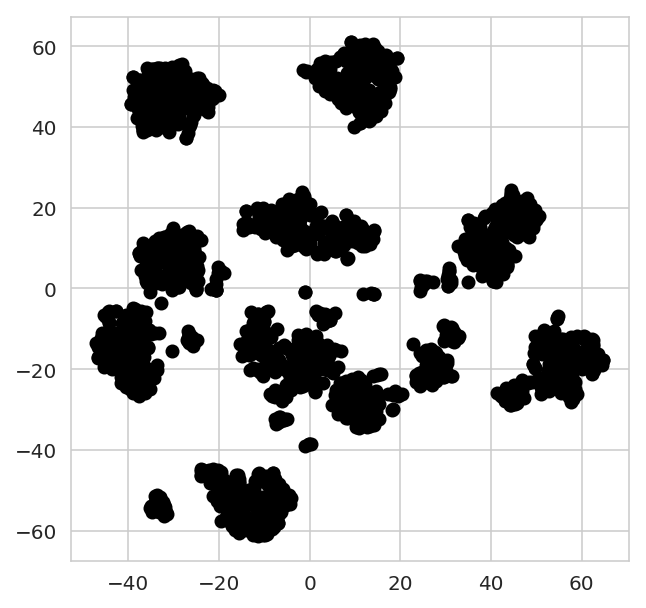

In [106]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(5, 5))
dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='black')

<!-- ![Black and white Digits dataset clustering scatterplot after TSNE dimensionality reduction to two dimensions](./ch14images/digits_black.png "Black and white Digits dataset clustering scatterplot after TSNE dimensionality reduction to two dimensions") -->

<hr style="height:2px; border:none; color:black; background-color:black;">

### Visualizing the Reduced Data (2 of 2)
* **Did not label axes** &mdash; they **do not correspond to specific features** of the original dataset
* **New features** produced by **`TSNE`** could be quite different from **dataset’s original features**
* Clear **clusters** of related data points
* Appear to be **11 main clusters, rather than 10** 
* Some **"loose" data points**  
    * Makes sense because, as you saw, **some digits were difficult to classify**

### Visualizing the Reduced Data with Different Colors for Each Digit
* **Don’t know** whether all the **items in each cluster** represent the **same digit** 
    * If not, then the clusters are not helpful 
* Use **`target`s** in **Digits dataset** to **color the dots** to see whether clusters indeed represent specific digits
* **`c=digits.target`** &mdash; use `target` values determine dot colors
* **`cmap=plt.cm.get_cmap('nipy_spectral_r', 10)`** &mdash; **color map** to use 
    * Specifically use **10 distinct colors** for the 10 digits 
* Last statement adds color bar key 

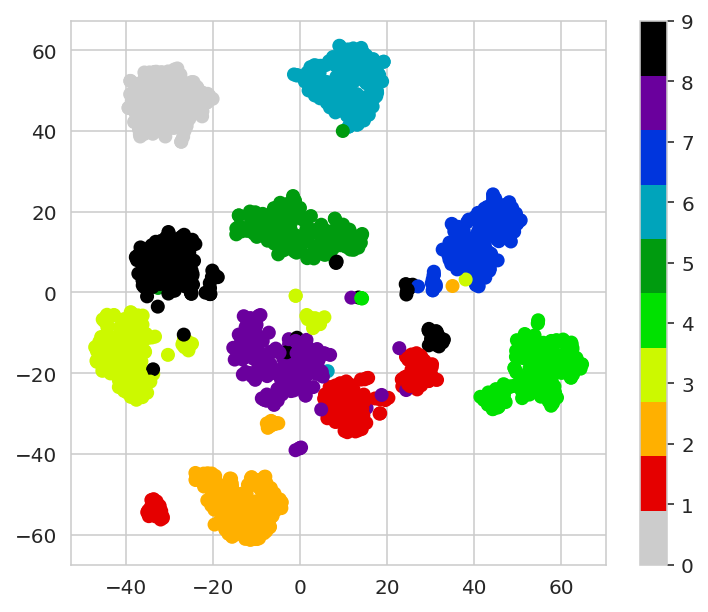

In [107]:
figure = plt.figure(figsize=(6, 5))

dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
    c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))
 
colorbar = plt.colorbar(dots)  

* Can use Matplotlib’s **`Axes3D`** for plotting in three-dimensional graphs
* Run provided **`digits3d.py`** file from the command line
    * Diagram in JupyterLab is not interactive without additional tools installed

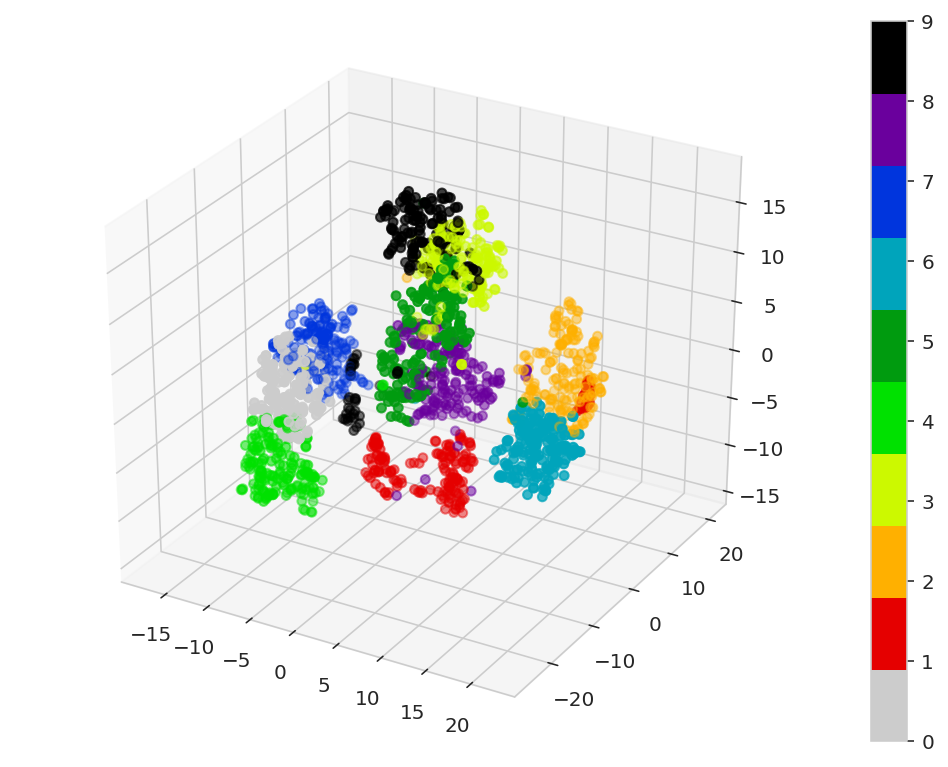

In [108]:
# Code for visualizing Digits dataset in 3D
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
digits = load_digits()
tsne3 = TSNE(n_components=3, random_state=11)
reduced_data3 = tsne3.fit_transform(digits.data) 
figure = plt.figure(figsize=(7, 5))
axes = figure.add_subplot(projection='3d')
axes = axes3d.Axes3D(figure)
dots = axes.scatter(reduced_data3[:, 0], reduced_data3[:, 1], reduced_data3[:, 2], 
    c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))
colorbar = plt.colorbar(dots)

<hr style="height:2px; border:none; color:black; background-color:black;">

# 14.7 Case Study: Unsupervised Machine Learning, Part 2—k-Means Clustering (1 of 2)
* **Simplest** unsupervised machine learning algorithm 
* Analyze **unlabeled samples** and **attempt to place them in clusters**
* **_k_** hyperparameter represents **number of clusters** to impose on the data
* Organizes clusters using **distance calculations** similar to the **k-NN classification** 

<hr style="height:2px; border:none; color:black; background-color:black;">

# 14.7 Case Study: Unsupervised Machine Learning, Part 2—k-Means Clustering (2 of 2)
* Each **cluster** is grouped around a **centroid** (cluster’s **center point**)
* Initially, the algorithm **chooses _k_ centroids at random** from **dataset’s samples**
* **Remaining samples** placed in the cluster whose **centroid is the closest** 
* **Centroids are iteratively recalculated** and **samples re-assigned** to clusters until, for all clusters, **distances** from a given centroid to the samples in its cluster are **minimized**
Results are:
	* **one-dimensional array of labels** indicating **cluster** to which **each sample belongs** 
	* **two-dimensional array of clusters' centroids** 

<hr style="height:2px; border:none; color:black; background-color:black;">

### Iris Dataset 
* **Iris dataset** &mdash; commonly analyzed with **classification and clustering**
	* Fisher, R.A., “The use of multiple measurements in taxonomic problems,” Annual Eugenics, 7, Part II, 179-188 (1936); also in “Contributions to Mathematical Statistics” (John Wiley, NY, 1950).
* Dataset is **labeled** &mdash; we’ll **ignore labels** to demonstrate clustering
    * Use labels later to determine **how well k-means algorithm clustered samples**
* **"Toy dataset"** &mdash; has only **150 samples** and **four features**
    * **50 samples** for each of **three _Iris_ flower species** (balanced classes)
    * **Iris setosa**, **Iris versicolor** and **Iris virginica**
    * Features: **sepal length**, **sepal width**, **petal length** and **petal width**, all measured in centimeters. 
    * **Sepals** are **larger outer parts** of each flower that protect smaller inside **petals** before buds bloom

**Iris setosa**: https://commons.wikimedia.org/wiki/File:Wild_iris_KEFJ_(9025144383).jpg.
Credit: Courtesy of Nation Park services.

<img src="./ch14images/Wild_iris_KEFJ_(9025144383).png" alt="https://commons.wikimedia.org/wiki/File:Wild_iris_KEFJ_(9025144383).jpg. Credit: Courtesy of Nation Park services." width=300/>

**Iris versicolor**: https://commons.wikimedia.org/wiki/Iris_versicolor#/media/File:IrisVersicolor-FoxRoost-Newfoundland.jpg. 
Credit: Courtesy of Jefficus, https://commons.wikimedia.org/w/index.php?title=User:Jefficus&action=edit&redlink=1

<img src="./ch14images/IrisVersicolor-FoxRoost-Newfoundland.png" alt="Iris versicolor: https://commons.wikimedia.org/wiki/Iris_versicolor#/media/File:IrisVersicolor-FoxRoost-Newfoundland.jpg. Credit: Courtesy of Jefficus, https://commons.wikimedia.org/w/index.php?title=User:Jefficus&action=edit&redlink=1." width=300/>

**Iris virginica**: https://commons.wikimedia.org/wiki/File:IMG_7911-Iris_virginica.jpg. Credit: Christer T Johansson.

<img src="./ch14images/IMG_7911-Iris_virginica.png" alt="Iris virginica: https://commons.wikimedia.org/wiki/File:IMG_7911-Iris_virginica.jpg. Credit: Christer T Johansson." width=300/>

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.7.1 Loading the Iris Dataset
* **Classifies samples** by **labeling** them with the integers **0, 1 and 2**, representing **Iris setosa**, **Iris versicolor** and **Iris virginica**, respectively 

In [109]:
from sklearn.datasets import load_iris

In [110]:
iris = load_iris()

In [111]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

<hr style="height:2px; border:none; color:black; background-color:black;">

### Checking the Numbers of Samples, Features and Targets 

In [112]:
iris.data.shape

(150, 4)

In [113]:
iris.target.shape

(150,)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Array `target_names` Contains Names for the `target` Array’s Numeric Labels
* **`dtype='<U10'`** &mdash; elements are **strings with a max of 10 characters**

In [114]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<hr style="height:2px; border:none; color:black; background-color:black;">

### Array `feature_names` Contains Names for Each Column in the `data` array:

In [115]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.7.2 Exploring the Iris Dataset: Descriptive Statistics with a Pandas `DataFrame` 
### Create a `DataFrame` containing the `data` array’s contents
* Use **`feature_names`** as the **column names**

In [116]:
import pandas as pd
pd.set_option('precision', 2)

In [117]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Add a column containing each sample’s species name
* **List comprehension** uses each value in **`target` array** to look up the corresponding **species name** in **`target_names` array**

In [118]:
iris_df['species'] = [iris.target_names[i] for i in iris.target]

<hr style="height:2px; border:none; color:black; background-color:black;">

### Look at a few samples  

In [119]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


###  Calling `describe` on the `'species'` column confirms that it contains three unique values

In [120]:
iris_df['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

* We **know in advance** that there are **three classes** to which the samples belong
    * This is **not** typically the case in **unsupervised machine learning**

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.7.3 Visualizing the Dataset with a Seaborn pairplot (1 of 3)
* To **learn more about your data**, **visualize** how the features relate to one another
* Four features &mdash; cannot graph one against other three in a single graph
* Can **plot pairs of features** against one another 
* **Seaborn function `pairplot`** creates a **grid of graphs**

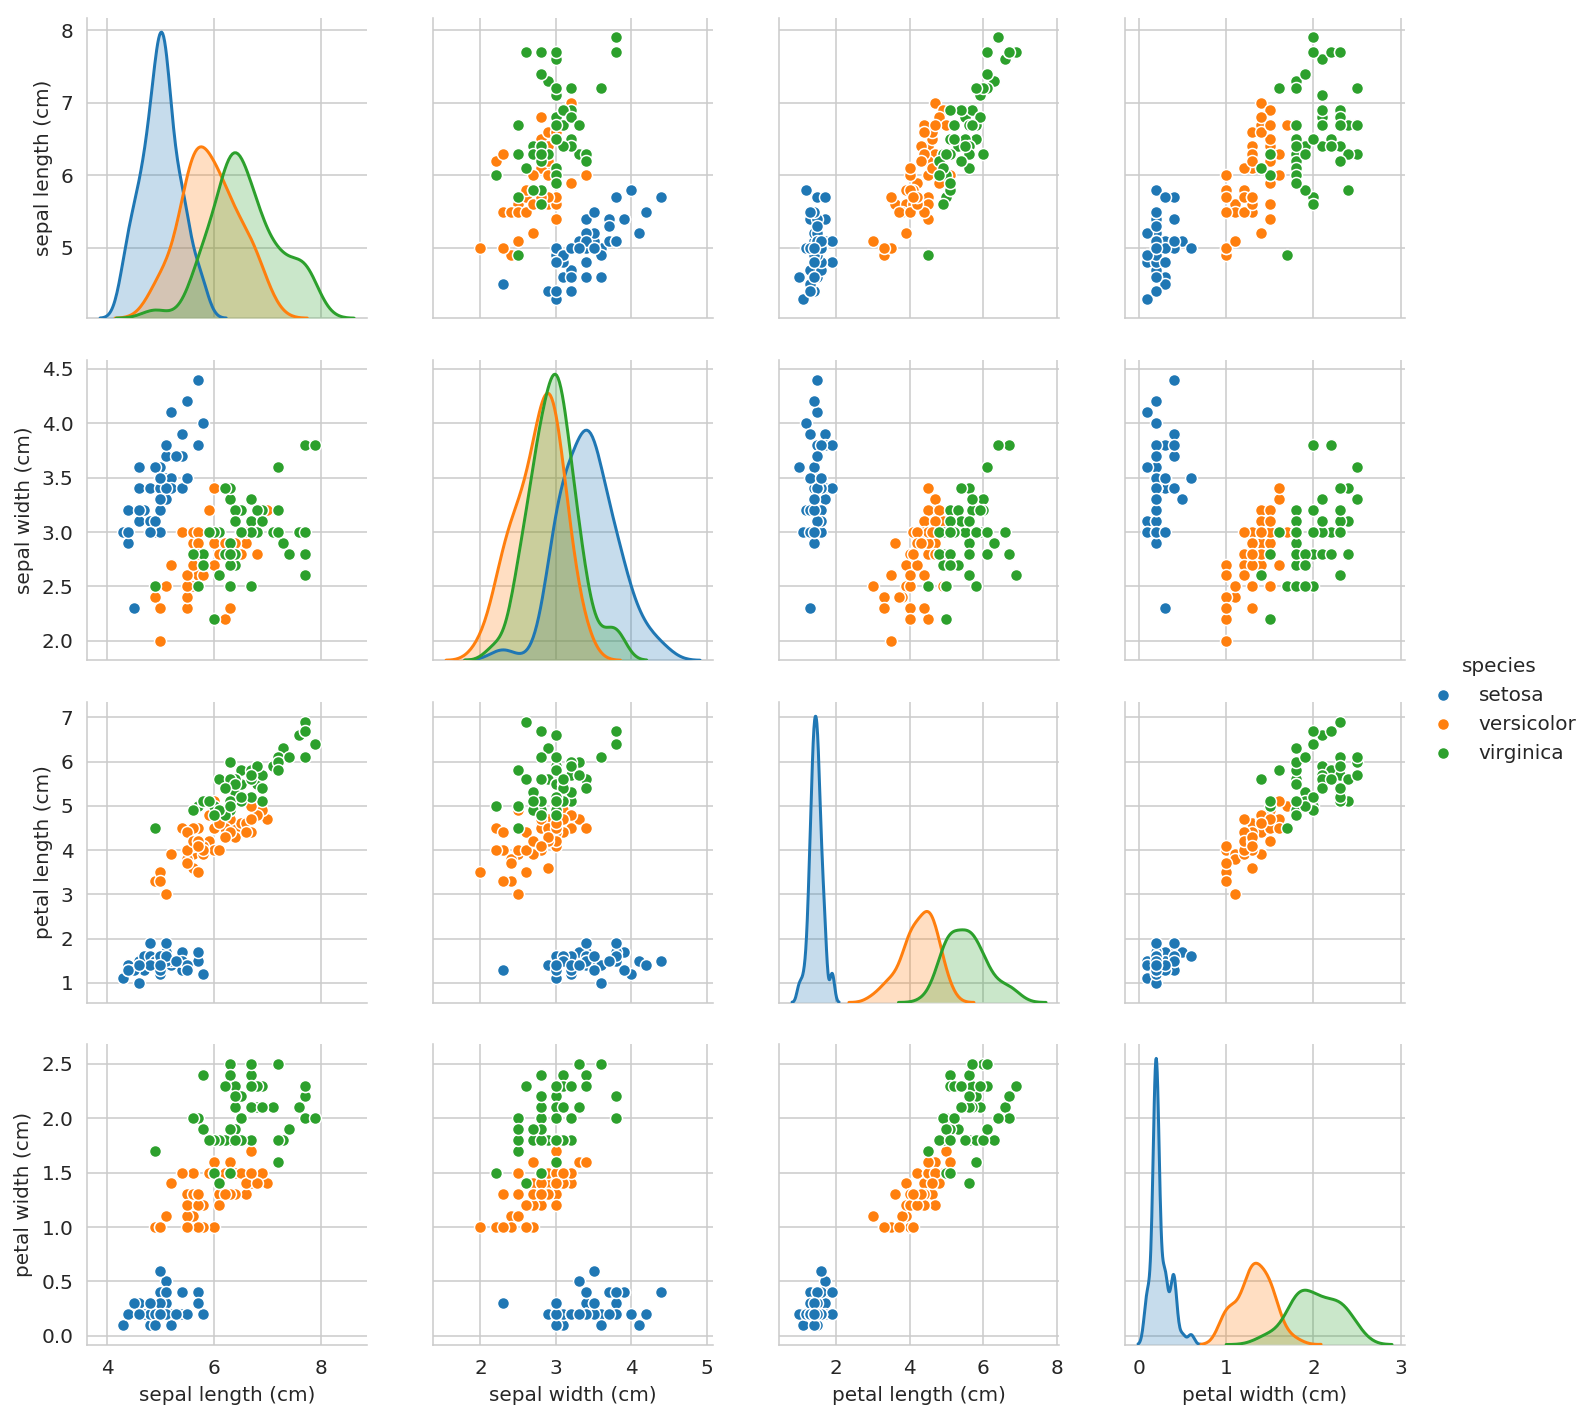

In [121]:
import seaborn as sns

sns.set_style('whitegrid')

grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4], hue='species')

## 14.7.3 Visualizing the Dataset with a Seaborn pairplot (3 of 3)
* Other graphs in a column show **scatter plots** of the other features against the feature on the **x-axis**
* **All the scatter plots clearly separate Iris setosa blue dots from other species’ orange and green dots**
    * **Iris setosa** is indeed in a **"class by itself"**
* Other two species **sometimes confused**, as indicated by **overlapping** orange and green dots
	* **Difficult to distinguish these two species** if we had **only sepal measurements** available to us

<hr style="height:2px; border:none; color:black; background-color:black;">

### Displaying the `pairplot` in One Color (1 of 3)
* If you **remove `hue` argument**, `pairplot` uses **one color** to plot all the data

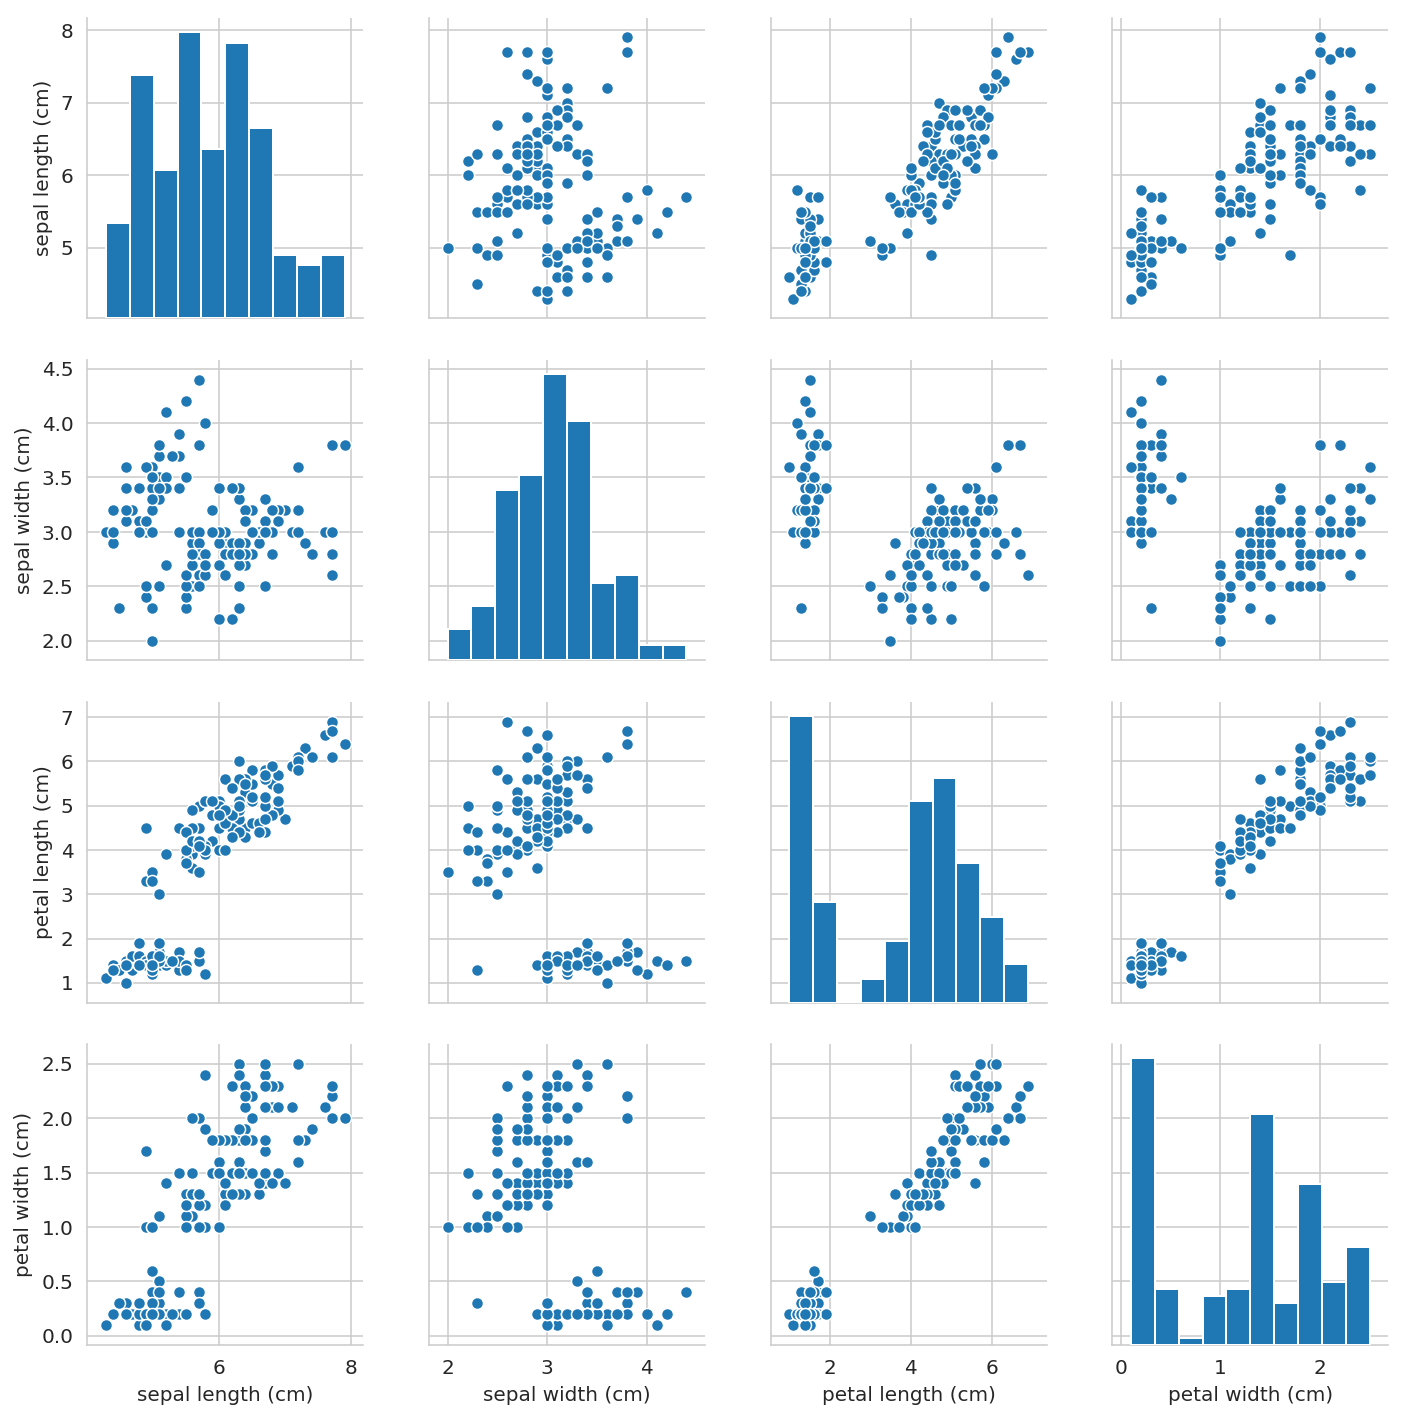

In [122]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4])

<hr style="height:2px; border:none; color:black; background-color:black;">

### Displaying the `pairplot` in One Color (2 of 3)
* **Graphs along diagonal are histograms** showing **distributions** of values for each feature, **regardless of species** 
* Appears that there **may be only _two_ distinct clusters**, even though for this dataset we know there are **three** species
	* If you **do not know number of clusters in advance**, you might ask a **domain expert** who is thoroughly familiar with the data 
	* Such a person **might know** that there are **three species** in the dataset, which would be **valuable information** as we try to **perform machine learning on the data**

<hr style="height:2px; border:none; color:black; background-color:black;">

### Displaying the `pairplot` in One Color (3 of 3)
* **`pairplot` diagrams** work well for 
    * **Small number of features** or a subset of features so you have a **small number of rows and columns**
    * Relatively **small number of samples** so you can **see the data points** 
* As **number of features and samples increases**, each scatter plot quickly becomes **too small to read** 

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.7.4 Using a `KMeans` Estimator
* Use k-means clustering via **`KMeans` estimator** to place each sample in the Iris dataset into a cluster

### Creating the `KMeans` Estimator 
* [`KMeans` default arguments](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
* When you **train a `KMeans` estimator**, it calculates for each cluster a **centroid** representing the **cluster’s center data point** 
	* Often, you’ll rely on **domain experts** to help **choose an appropriate _k_** (`n_clusters`). 
* Can also use **hyperparameter tuning** to estimate the appropriate **k**

In [123]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=11)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Fitting the Model Via the `KMeans` object’s `fit` Method
* When the training completes, the `KMeans` object contains: 
	* **`labels_` array** with values from **`0` to `n_clusters - 1`**, indicating the clusters to which the samples belong
	* **`cluster_centers_` array** in which **each row represents a centroid**

In [124]:
kmeans.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=11, tol=0.0001, verbose=0)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Comparing the Cluster Labels to the Iris Dataset’s Target Values (1 of 2)
* **Iris dataset** is **labeled**, so we can look at **`target` array values** to get a sense of **how well the k-means algorithm clustered the samples** 
    * With **unlabeled data**, we’d depend on a **domain expert** to help **evaluate whether the predicted classes make sense**
* First 50 samples are **Iris setosa**, next 50 are **Iris versicolor**, last 50 are **Iris virginica**
    * **`target` array** represents these with values **0–2** 
* If **`KMeans` chose clusters perfectly**, then **each group of 50 elements in the estimator’s `labels_` array should have a distinct label**. 
    * **`KMeans` labels** are **not related** to dataset’s **`target` array** 

### Comparing the Cluster Labels to the Iris Dataset’s Target Values (2 of 2)
* First 50 samples should be **one cluster** 

In [125]:
print(kmeans.labels_[0:50])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


* Next 50 samples should be a **second cluster** (two are not)

In [126]:
print(kmeans.labels_[50:100])

[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


* Last 50 samples should be a **third cluster** (14 are not)

In [127]:
print(kmeans.labels_[100:150])

[2 0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 0]


* Results confirm what we saw in **`pairplot` diagrams**
    * **Iris setosa** is “in a class by itself” 
    * There is confusion between **Iris versicolor** and **Iris virginica**

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.7.5 Dimensionality Reduction with Principal Component Analysis
* Use **`PCA` estimator** to perform dimensionality reduction from **4 to 2 dimensions**
	* [Algorithm’s details](https://scikit-learn.org/stable/modules/decomposition.html#pca) beyond scope

In [128]:
from sklearn.decomposition import PCA

In [129]:
pca = PCA(n_components=2, random_state=11)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Transforming the Iris Dataset’s Features into Two Dimensions

In [130]:
pca.fit(iris.data)  # trains estimator once

PCA(copy=True, iterated_power='auto', n_components=2, random_state=11,
  svd_solver='auto', tol=0.0, whiten=False)

In [131]:
iris_pca = pca.transform(iris.data)  # can be called many times to reduce data

* We'll call **`transform`** again to **reduce the cluster centroids from four dimensions to two** for plotting 
* **`transform`** returns an array with same number of rows as `iris.data`, but only two columns

In [132]:
iris_pca.shape

(150, 2)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Visualizing the Reduced Data in a Scatter Plot
* Place reduced data in a **`DataFrame`** and **add a species column** that we’ll use to **determine dot colors**

In [133]:
iris_pca_df = pd.DataFrame(iris_pca, 
                           columns=['Component1', 'Component2'])

In [134]:
iris_pca_df['species'] = iris_df.species

### Scatterplot the Data with Seaborn
* Each **centroid** in **`cluster_centers_`** array has **same number of features** (four) as dataset's samples
* **To plot centroids**, we must **reduce their dimensions**
* Think of a **centroid** as the **“average” sample in its cluster**
	* So each centroid should be **transformed** using **same `PCA` estimator** as **other samples**

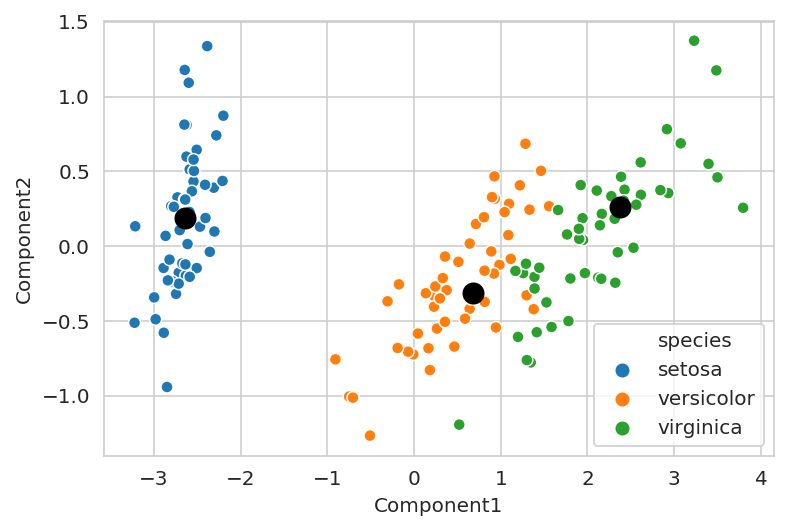

In [135]:
axes = sns.scatterplot(data=iris_pca_df, x='Component1', 
    y='Component2', hue='species', legend='brief') 

# reduce centroids to 2 dimensions
iris_centers = pca.transform(kmeans.cluster_centers_)

# plot centroids as larger black dots
import matplotlib.pyplot as plt

dots = plt.scatter(iris_centers[:,0], iris_centers[:,1], s=100, c='k')

<hr style="height:2px; border:none; color:black; background-color:black;">

## 14.7.6 Choosing the Best Clustering Estimator (1 of 5)
* **Run multiple clustering algorithms** and see **how well they cluster Iris species** 
	* We’re running `KMeans` here on the **small** Iris dataset
    * If you experience **performance problems with `KMeans`** on larger datasets, consider **`MiniBatchKMeans`**
    * Documentation indicates **`MiniBatchKMeans` is faster on large datasets** and the results are almost as good

## 14.7.6 Choosing the Best Clustering Estimator (2 of 5)
* For the `DBSCAN` and `MeanShift` estimators, we do **not** specify number of clusters in advance

In [136]:
from sklearn.cluster import DBSCAN, MeanShift,\
    SpectralClustering, AgglomerativeClustering

In [137]:
estimators = {
    'KMeans': kmeans,
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=3),
    'AgglomerativeClustering': 
        AgglomerativeClustering(n_clusters=3)
}

## 14.7.6 Choosing the Best Clustering Estimator (3 of 5) 

In [138]:
import numpy as np

In [139]:
for name, estimator in estimators.items():
    estimator.fit(iris.data)
    print(f'\n{name}:')
    for i in range(0, 101, 50):
        labels, counts = np.unique(
            estimator.labels_[i:i+50], return_counts=True)
        print(f'{i}-{i+50}:')
        for label, count in zip(labels, counts):
            print(f'   label={label}, count={count}')          


KMeans:
0-50:
   label=1, count=50
50-100:
   label=0, count=48
   label=2, count=2
100-150:
   label=0, count=14
   label=2, count=36

DBSCAN:
0-50:
   label=-1, count=1
   label=0, count=49
50-100:
   label=-1, count=6
   label=1, count=44
100-150:
   label=-1, count=10
   label=1, count=40

MeanShift:
0-50:
   label=1, count=50
50-100:
   label=0, count=49
   label=1, count=1
100-150:
   label=0, count=50

SpectralClustering:
0-50:
   label=0, count=50
50-100:
   label=1, count=50
100-150:
   label=1, count=15
   label=2, count=35

AgglomerativeClustering:
0-50:
   label=1, count=50
50-100:
   label=0, count=49
   label=2, count=1
100-150:
   label=0, count=15
   label=2, count=35


## 14.7.6 Choosing the Best Clustering Estimator (4 of 5)
* **`DBSCAN` correctly predicted three clusters** (labeled `-1`, `0` and `1`)
    * Placed 84 of the 100 **Iris virginica** and **Iris versicolor** in the same cluster
* **`MeanShift` predicted only two clusters** (labeled as `0` and `1`)
    * Placed 99 of 100 **Iris virginica** and **Iris versicolor** samples in same cluster

## 14.7.6 Choosing the Best Clustering Estimator (5 of 5)
* **What do you do with the cluster information once you have it?**
	* If goal is to use the data in **supervised machine learning**, typically you’d 
        * study the samples in each cluster 
        * try to determine how they’re related 
        * label them accordingly
* **Unsupervised learning** is commonly used in **deep-learning applications**
* **Examples of unlabeled data** processed with **unsupervised learning**
    * Social media posts: Tweets, Facebook posts, ...
    * Media: Videos, images, audio
    * Text: News articles, customers’ product reviews, viewers’ movie reviews
    * and more

# More Info 
* See **video** Lesson 14 in [**Python Fundamentals LiveLessons** here on Safari Online Learning](https://learning.oreilly.com/videos/python-fundamentals/9780135917411)
* See **book** Chapter 14 in [**Python for Programmers** on Safari Online Learning](https://learning.oreilly.com/library/view/python-for-programmers/9780135231364/)
* See Chapter 15 in **Intro Python for Computer Science and Data Science** on [VitalSource.com](https://www.vitalsource.com/products/intro-to-python-for-computer-science-and-data-paul-j-deitel-harvey-deitel-v9780135404812) or [RedShelf.com](https://redshelf.com/book/1157786/intro-to-python-for-computer-science-and-data-science-1157786-9780135404812-paul-j-deitel-harvey-deitel)
* Interested in a print book? Check out:

| Python for Programmers<br>(640-page professional book) | Intro to Python for Computer<br>Science and Data Science<br>(880-page college textbook)
| :------ | :------
| <a href="https://amzn.to/2VvdnxE"><img alt="Python for Programmers cover" src="../images/PyFPCover.png" width="150" border="1"/></a> | <a href="https://amzn.to/2LiDCmt"><img alt="Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud" src="../images/IntroToPythonCover.png" width="159" border="1"></a>

>Please **do not** purchase both books&mdash;our professional book **_Python for Programmers_** is a subset of our college textbook **_Intro to Python for Computer Science and Data Science_**

&copy; 2019 by Pearson Education, Inc. All Rights Reserved. The content in this notebook is based on the book [**Python for Programmers**](https://amzn.to/2VvdnxE).